
# Project 1: Digit Classification with KNN


# Intro
---
In this project, you'll implement your own image recognition system for classifying digits. Read through the code and the instructions carefully and add your own code where indicated. Each problem can be addressed succinctly with the included packages -- please don't add any more. 
As always, you're welcome to work on the project in groups and discuss ideas over Slack, but <b> please prepare your own write-up (with your own code). </b> To be safe, please credit any sources used.


## Grading
---
 - Make sure to answer every part in every question.
 - There are 5 questions, each worth an equal number of points.
 - Read carefully what is asked including the notes.
 - Additional points may be deducted if:
   - the code is not clean or is not well commented
   - the functions or answers are excessively long

## Requirements:
---
1. Comment your code.
1. Each graph should have a title, labels for each axis, and (if needed) a legend. Each graph should be understandable on its own.
1. All code must run on colab.research.google.com
1. You should not import any additional libraries.
1. Try and minimize the use of the global namespace (meaning, keep things inside functions).

## Additional reading and notes
---

If you are looking to get started with Tensorflow, you can read through this tutorial: https://www.tensorflow.org/tutorials/keras/classification. It uses a dataset called "fashion_mnist", which is identical in structure to the original digit mnist, but uses images of clothing rather than images of digits. The number of training examples and number of labels is the same. In fact, you can simply replace the code that loads "fashion_mnist" with "mnist" and everything should work fine.

Additionally, if you're interested, check out these links related to digit recognition:

* Yann Lecun's MNIST benchmarks: http://yann.lecun.com/exdb/mnist/
* Stanford Streetview research and data: http://ufldl.stanford.edu/housenumbers/

In [1]:
# This tells matplotlib not to try opening a new window for each plot.
%matplotlib inline

# Import a bunch of libraries.
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator
from sklearn.pipeline import Pipeline
from sklearn.datasets import fetch_openml
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LinearRegression
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

# Set the randomizer seed so results are the same each time.
np.random.seed(0)

In [2]:
import sklearn
sklearn.__version__

'1.0.2'

Load the data. Notice that the data gets partitioned into training, development, and test sets. Also, a small subset of the training data called mini_train_data and mini_train_labels gets defined, which you should use in all the experiments below, unless otherwise noted.

In [3]:
# Add as_frame = false, we don't want a dataframe
# Load the digit data from https://www.openml.org/d/554 or from default local location '~/scikit_learn_data/...'
X, Y = fetch_openml(name='mnist_784', as_frame=False, return_X_y=True, cache=False)

# Rescale grayscale values to [0,1].
X = X / 255.0

# Shuffle the input: create a random permutation of the integers between 0 and the number of data points and apply this
# permutation to X and Y.
# NOTE: Each time you run this cell, you'll re-shuffle the data, resulting in a different ordering.
shuffle = np.random.permutation(np.arange(X.shape[0]))
X, Y = X[shuffle], Y[shuffle]

print('data shape: ', X.shape)
print('label shape:', Y.shape)

# Set some variables to hold test, dev, and training data.
test_data, test_labels = X[61000:], Y[61000:]
dev_data, dev_labels = X[60000:61000], Y[60000:61000]
train_data, train_labels = X[:60000], Y[:60000]
mini_train_data, mini_train_labels = X[:1000], Y[:1000]

data shape:  (70000, 784)
label shape: (70000,)


### Question 1: Visualize a select sample of images
---
Show a 10x10 grid that visualizes 10 examples of each digit.

Notes:
* Make the digits nice and big.
* You can use `plt.rc()` for setting the colormap, for example to black and white.
* You can use `plt.subplot()` for creating subplots.
* You can use `plt.imshow()` for rendering a matrix.
* You can use `np.array.reshape()` for reshaping a 1D feature vector into a 2D matrix (for rendering).

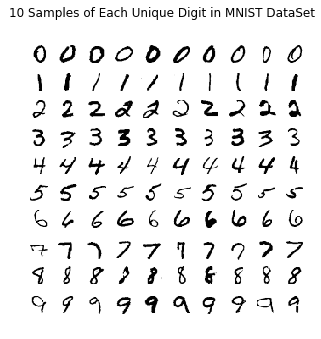

In [18]:
def Q1(num_examples=10):
### STUDENT START ###
    # Get all unique digits from labels 
    digits = np.unique(Y)
        
    # Each subplot/number entry for the 10x10 grid 
    fig, axes = plt.subplots(num_examples, num_examples, figsize=(5,5))
    
    # Set the entire plot to Greys (Alternative is to add a cmap='Greys' for each imshow)
    plt.rc("image", cmap="Greys")
   
    # Title 
    plt.suptitle("10 Samples of Each Unique Digit in MNIST DataSet")
    
    # Loop over each unique digit
    for i, digit in enumerate(digits):
        # Get 10 examples of each unique digit
        for sample in range(10):
            # Reshape the image to 28x28
            image = mini_train_data[mini_train_labels == digit][sample].reshape(28,28)
            # Plot the subplot
            axes[i,sample].imshow(image)
            # Don't want subplot axes
            axes[i,sample].axis("off")  
### STUDENT END ###
Q1(10)

### Question 2: Evaluating different choices of k
---

1. Produce k-Nearest Neighbors models with k = 1, 3, 5, 7, and 9.  
1. Print the accuracy of each model. 
1. Additionally, only for the 1-Nearest Neighbor model, show the precision, recall, and F1 for each label. 
1. Which digit is the most *difficult* for the 1-Nearest Neighbor model to classify correctly? How did you choose and why?

Notes:
* Train on the mini train set.
* Evaluate performance on the dev set.
* Print only the information asked so it is easy to read and compare.
* You can use `KNeighborsClassifier` to produce a k-nearest neighbor model.
* You can use `classification_report` to get precision, recall, and F1 results.
* Check out what the function "score" does.

In [5]:
def Q2(k_values):
### STUDENT START ###
    for k in k_values:
        # Train Classifier
        knnClassifier = KNeighborsClassifier(n_neighbors = k,  metric = 'minkowski', p = 2)
        knnClassifier.fit(mini_train_data, mini_train_labels)
        
        # Use Dev Data to to get the score of each model
        # For only k = 1 we want additional calculations
        if k == 1:
          print('k=1')
          print(classification_report(dev_labels, knnClassifier.predict(dev_data)))
        else:
          print(f'k={k} and accuracy:{knnClassifier.score(dev_data, dev_labels)}')

### STUDENT END ###

k_values = [1, 3, 5, 7, 9]
Q2(k_values)

k=1
              precision    recall  f1-score   support

           0       0.95      0.95      0.95       106
           1       0.89      0.98      0.93       118
           2       0.90      0.79      0.84       106
           3       0.93      0.87      0.90        97
           4       0.91      0.85      0.88        92
           5       0.86      0.88      0.87        88
           6       0.92      0.92      0.92       102
           7       0.85      0.94      0.89       102
           8       0.83      0.77      0.80        94
           9       0.80      0.86      0.83        95

    accuracy                           0.88      1000
   macro avg       0.88      0.88      0.88      1000
weighted avg       0.89      0.88      0.88      1000

k=3 and accuracy:0.876
k=5 and accuracy:0.882
k=7 and accuracy:0.877
k=9 and accuracy:0.875


Answer to part 4: Digit 8 because it has the lowest F1-Score. 

### Question 3: Examining the importance of training size
---
1. Produce 1-Nearest Neighbor models using training data of various sizes. For example, ```train_data[:train_size]```.
1. Evaluate and show the accuracy achieved by each model.  
1. Show the time needed to: 
  1. Train each model.
  1. Measure the accuracy of each model.
1. What do you see? Is this what you expected to see and why?
1. Plot on the same graph (as a function of training size):
  1. the time needed for training
  1. the time needed for calculating accuracy

Notes:
* Evaluate on the dev set.
* You can use `KNeighborsClassifier` to produce a k-nearest neighbor model.
* You can use `time.time()` to measure elapsed time of operations.

Train Size = 100, Train Time = 0.0010759830474853516 and accuracy = 0.702, accuracyTime = 0.009031057357788086
Train Size = 200, Train Time = 0.0005002021789550781 and accuracy = 0.791, accuracyTime = 0.008843421936035156
Train Size = 400, Train Time = 0.0006880760192871094 and accuracy = 0.811, accuracyTime = 0.012788772583007812
Train Size = 800, Train Time = 0.0008816719055175781 and accuracy = 0.866, accuracyTime = 0.020630359649658203
Train Size = 1600, Train Time = 0.0016684532165527344 and accuracy = 0.905, accuracyTime = 0.03995013236999512
Train Size = 3200, Train Time = 0.003545999526977539 and accuracy = 0.927, accuracyTime = 0.10875344276428223
Train Size = 6400, Train Time = 0.007074832916259766 and accuracy = 0.939, accuracyTime = 0.21198606491088867
Train Size = 12800, Train Time = 0.011501073837280273 and accuracy = 0.952, accuracyTime = 0.3944728374481201
Train Size = 25600, Train Time = 0.022683143615722656 and accuracy = 0.963, accuracyTime = 0.7964160442352295


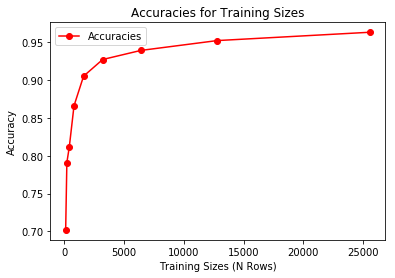

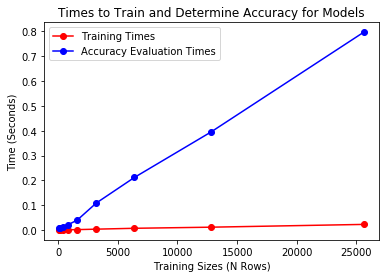

In [6]:
def Q3(train_sizes, accuracies, train_times, eval_times):
### STUDENT START ###
    # k = 1, is hardcoded. I would parameterize this, but hardcoding to follow instructions
    
    # Train and get accuracy for each training size
    # Append the data to the pass in parameters, which will be stored in the global scobe. 
    for size in train_sizes:
        # Training
        trainTimeStart = time.time()
        knnClassifier = KNeighborsClassifier(n_neighbors = 1,  metric = 'minkowski', p = 2)
        knnClassifier.fit(train_data[:size], train_labels[:size])
        trainTimeEnd = time.time()
        trainTime = trainTimeEnd - trainTimeStart
        train_times.append(trainTime)
        
        # Measuring Accuracy
        accuracyTimeStart = time.time()
        accuracy = knnClassifier.score(dev_data, dev_labels)
        accuracyTimeEnd = time.time()
        accuracyTime = accuracyTimeEnd - accuracyTimeStart
        eval_times.append(accuracyTime)
        accuracies.append(accuracy)
        
        # Output Evaluation
        print(f'Train Size = {size}, Train Time = {trainTime} and accuracy = {accuracy}, accuracyTime = {accuracyTime}')
        
    # Plot Accuracy 
    plt.title("Accuracies for Training Sizes")
    plt.xlabel("Training Sizes (N Rows)")
    plt.ylabel("Accuracy")
    plt.plot(train_sizes, accuracies, color ="red", marker = 'o', label = "Accuracies")
    plt.legend(loc="upper left")
    plt.show()

    # Plot Training and Accuracy Times
    plt.title("Times to Train and Determine Accuracy for Models")
    plt.xlabel("Training Sizes (N Rows)")
    plt.ylabel("Time (Seconds)")
    plt.plot(train_sizes, train_times, color ="red", marker = 'o', label = "Training Times")
    plt.plot(train_sizes, eval_times, color ="blue", marker = 'o', label = "Accuracy Evaluation Times")
    plt.legend(loc="upper left")
    plt.show()
        
### STUDENT END ###

train_sizes = [100, 200, 400, 800, 1600, 3200, 6400, 12800, 25600]
accuracies = []
train_times = []
eval_times = []
Q3(train_sizes, accuracies, train_times, eval_times)

Answer to part 4: Yes, this is what I expected to see. As you increase training sets, I expect accuracy to become better because there is more data to fine tune the model. Additionally, I expected larger data sets to take a longer time to train O(n) time. 

### Question 4: Evaluating if we should obtain additional data
---

In this question we wish to predict what accuracy we would get if we had additional training data.

Our input, our features and labels, are the output from the previous question. Based on the training size and accuracy we got in the previous question, we wish to predict the accuracy we would get if we had larger training sizes.

1. Produce a linear regression model that predicts accuracy of a 1-Nearest Neighbor model given training set size. 
1. Print $R^2$ of the linear regression model.  
1. Print the accuracies predicted for training set sizes 60000, 120000, and 1000000.  
1. Plot on a lineplot graph:
  1. the actual accuracies we obtained in the previous question 
  1. and the accuracies our model predicted we would have gotten.
  1. The X axis is the training set size. 
  1. You can limit the range of X and Y to the range where you have data for both plots. Meaning, in the this question, we want to visualize how good the prediction is.
1. What are two things that are wrong with our model?
1. Apply a transformation to the predictor features and a transformation to the outcome that make the predictions fix these issues. 
1. Show $R^2$ of the improved linear regression model.  
1. Print the accuracies predicted for training set sizes 60000, 120000, and 1000000.  
1. Plot a lineplot graph of both again as before.
  1. Be sure to plot this where the Y axis is accuracy and X axis is training set size, **not the transformed space**!
  1. Choose the range of X and Y to visualize effectively.

Notes:
* Train the linear regression models on all of the (transformed) accuracies estimated in Problem 3.
* Evaluate the linear regression models on all of the (transformed) accuracies estimated in Problem 3.
* You can use `LinearRegression` to produce a linear regression model.
* Remember that the sklearn `fit()` functions take an input matrix X and output vector Y. So, each input example in X is a vector, even if it contains only a single value.
* Hints:
  1. You have two problems here, how well your model fits and predicting *illogical* values of accuracy.
  1. You can look at:
    1. [logit](https://en.wikipedia.org/wiki/Logit): $\frac{1}{1 + e^{-x}} = \frac{e^x}{1+e^x}$ which takes numbers in $\[\infty,-\infty\]$ and outputs numbers in $(0, 1)$.
    1. [logistic](https://en.wikipedia.org/wiki/Logistic_function): $log(\frac{p}{1 - p})$ which takes numbers between $(0, 1)$ and outputs numbers between $\[\infty,-\infty\]$.
    1. It also happens that $x = logistic(p)$ is the same thing as $logit(x)=p$.

Simple Linear Regression Accuracy Predictions
R² score is 0.4177006634161019
Predicted accuracy for training size 60000: 1.2361731707874237
Predicted accuracy for training size 120000: 1.637428053637104
Predicted accuracy for training size 1000000: 7.522499668765751

Transformed Simple Linear Regression Accuracy Predictions
R² score is 0.9897378265316935
Predicted accuracy for training size 60000: 1.0
Predicted accuracy for training size 120000: 1.0
Predicted accuracy for training size 1000000: 1.0


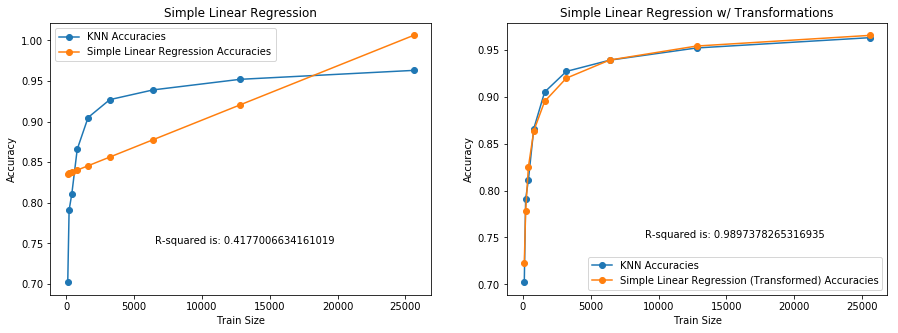

In [7]:
# Previous Variables that are on the global scope
# train_sizes, accuracies, train_times, eval_times

# Note: In conjuction with the instructions, I grouped my code by relevance and readability without adding any 
# additional functions, etc. To keep it all within the 1 Q4 function. As a developer, I would have broken out a lot of this
# code to helper functions to make it extremely readable / standardized, but leaving as is. 

def Q4():
### STUDENT START ###
    # Produce Linear Regression Model (1 and 6)
    # To use .fit, .predict we need an array of arrays (Vectors) for X, output Y is accuracies array (Vector) 

    # Simple Linear Regression (1) 
    linearRegressionX = np.array(train_sizes).reshape(-1, 1)
    linearRegressionModel = LinearRegression()
    linearRegressionModel.fit(linearRegressionX, accuracies)
    predictedAccuracies = linearRegressionModel.predict(linearRegressionX)
    
    # Transformed Simple Linear Regression (6)
    transformedLinearRegressionX = np.log(linearRegressionX)
    transformedAccuracies = []
    
    # Logit Lambda Function  
    logit = lambda x : np.log( x / (1-x))
    for accuracy in accuracies:
        transformedAccuracies.append(logit(accuracy))
    
    transformedLinearRegressionModel = LinearRegression()
    transformedLinearRegressionModel.fit(transformedLinearRegressionX, transformedAccuracies)
    predictedTransformedAccuracies = transformedLinearRegressionModel.predict(transformedLinearRegressionX)
    
    # Logistic Lambda Function
    logistic = lambda x: 1 / (1 + np.exp(-x))
    applyLogistic = np.vectorize(logistic)
    predictedTransformedAccuracies = applyLogistic(predictedTransformedAccuracies)
    
    # Print Simple Linear Regression Model Information
    print("Simple Linear Regression Accuracy Predictions")
    
    # Print R-Squared for the Linear Regression Model (2)
    rSquared = linearRegressionModel.score(linearRegressionX, accuracies)
    print(f'R² score is {rSquared}')
    
    # Print the accuracies predicted for training set sizes 60000, 120000, and 1000000. (3)
    largerTrainSizesX = np.array([60000, 120000, 1000000]).reshape(-1, 1)
    predictedAccuraciesLarger = linearRegressionModel.predict(largerTrainSizesX)
    for i in range(3):
        print(f'Predicted accuracy for training size {largerTrainSizesX[i][0]}: {predictedAccuraciesLarger[i]}')
    
    
    # Print Transformed Linear Regression Model Information
    print("\nTransformed Simple Linear Regression Accuracy Predictions")
    
    # Print R-Squared for the Transformed Linear Regression Model (7)
    rSquaredTransformed = transformedLinearRegressionModel.score(transformedLinearRegressionX, transformedAccuracies)
    print(f'R² score is {rSquaredTransformed}')
    
    # Print the accuracies predicted for training set sizes 60000, 120000, and 1000000. (8)
    predictedAccuraciesLargerTransformed = applyLogistic(transformedLinearRegressionModel.predict(largerTrainSizesX))
    for i in range(3):
        print(f'Predicted accuracy for training size {largerTrainSizesX[i][0]}: {predictedAccuraciesLargerTransformed[i]}')
    
    # Line Plot (4)
    # Figure with Subplots
    fig, plots = plt.subplots(nrows=1, ncols=2,figsize=(15, 5))

    # Plot - Simple Linear Regression 
    plots[0].plot(train_sizes, accuracies, marker = 'o', label = "KNN Accuracies")
    plots[0].plot(train_sizes, predictedAccuracies, marker = 'o', label = "Simple Linear Regression Accuracies")
    plots[0].set_title("Simple Linear Regression")
    plots[0].set_ylabel("Accuracy")
    plots[0].set_xlabel("Train Size")
    plots[0].text(6500, 0.75, f'R-squared is: {rSquared}')
    plots[0].legend()
    
    # Line Plot (9)
    # Plot - Transformed X and Y for Simple Linear Regression Model
    plots[1].plot(train_sizes, accuracies, marker = 'o', label = "KNN Accuracies")
    plots[1].plot(train_sizes, predictedTransformedAccuracies, marker = 'o', label = "Simple Linear Regression (Transformed) Accuracies")
    plots[1].set_title("Simple Linear Regression w/ Transformations")
    plots[1].set_ylabel("Accuracy")
    plots[1].set_xlabel("Train Size")
    plots[1].text(9000, 0.75, f'R-squared is: {rSquaredTransformed}')
    plots[1].legend()
        

### STUDENT END ###

Q4()

Answer to part 5:  
(1) We are attempting to use a simple linear model to fit a non linear X and Y relationship. 
(2) Y (Accuracy Prediction) isnt bound by the range [0, 1], instead it can go beyond 1, which doesn't make sense. 

### Question 5: Getting to know the confusion matrix.
---

1. Produce a 1-Nearest Neighbor model.
1. Show the confusion matrix. 
1. Which digit does the model most often confuse with which digit? (*for example, the model most often mistakes the digit $1$ as the digit $7$*).
1. Show examples of the misclassified digit.

Notes:
- Train on the mini train set.
- Evaluate performance on the dev set.
- You can use `confusion_matrix()` to produce a confusion matrix.
- No need to calculate the "most confused digits" programmatically.

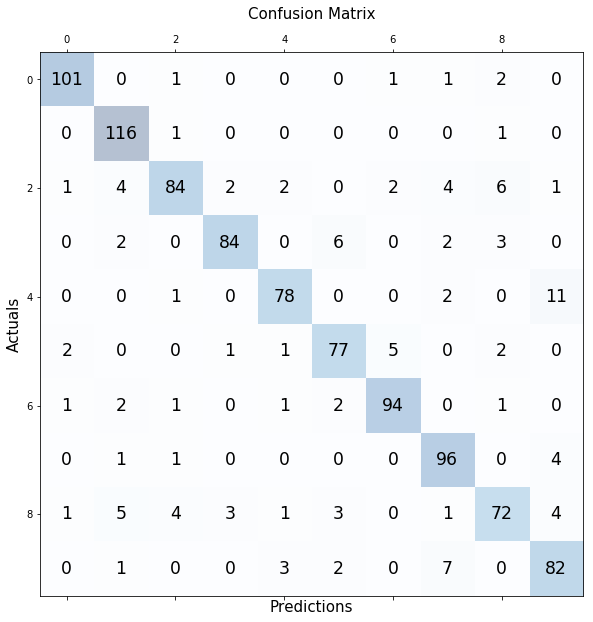

11 examples of Digit 4 mislabeled as Digit 9


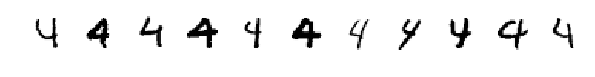

In [69]:
def Q5():
### STUDENT START ###
    # Train Classifier (1)
    knnClassifier = KNeighborsClassifier(n_neighbors = 1,  metric = 'minkowski', p = 2)
    knnClassifier.fit(mini_train_data, mini_train_labels)
    
    # Predict Digits from dev_data
    dev_predicted_labels = knnClassifier.predict(dev_data)
    
    # Confusion Matrix - Comparison between model predicted labels and actual dev labels
    confusionMatrix = confusion_matrix(dev_labels, dev_predicted_labels)
    confusionMatrixDF = pd.DataFrame(confusionMatrix, columns=range(10), index=range(10))
    
    # Prettify the confusion matrix (2)
    fig, ax = plt.subplots(figsize=(10, 10))
    ax.matshow(confusionMatrix, cmap = plt.cm.Blues, alpha=0.3)
    # Loop over each row in the confusion matrix and populate the prettified matrix
    # At the same time we are going to figure out the misclassified digit that occurs the most
    maxMisclassified = 0
    for i in range(confusionMatrix.shape[0]):
        # For each column (digit) 
        for j in range(confusionMatrix.shape[1]):
            # Populate the confusion matrix squares
            ax.text(x=j, y=i, s=confusionMatrix[i, j], va='center', ha='center', size='xx-large')
            # Figure out misclassified digit
            if(i!=j and maxMisclassified < confusionMatrix[i,j]):
                maxMisclassified = confusionMatrix[i, j]
                actualDigit = i
                misclassifiedDigit = j
            
            
    # Add labels and title to the plot
    plt.title('Confusion Matrix', fontsize=15)
    plt.xlabel('Predictions', fontsize=15)
    plt.ylabel('Actuals', fontsize=15)
    plt.show()  
    
    # Filter Logic to Grab the images that were misclassified
    # Triple Filter: (1) dev != predicted, (2) dev = actualDigit, (3) predicted = misclassifiedDigit
    # np.where returns index locations where filter is True
    misclassifiedDigits = np.where((dev_labels != dev_predicted_labels) & (dev_labels == str(actualDigit)) & (dev_predicted_labels == str(misclassifiedDigit)))

    
    # Show examples of the misclassified digit (4)
    print('{} examples of Digit {} mislabeled as Digit {}'.format(maxMisclassified, actualDigit, misclassifiedDigit))
    fig2, axes = plt.subplots(1, maxMisclassified, figsize=(10, 10))
    plt.rc("image", cmap="Greys")
    for i, dataEntry in enumerate(misclassifiedDigits[0]):
        image = dev_data[dataEntry,:].reshape(28, 28)
        axes[i].imshow(image)
        axes[i].axis("off")
    
### STUDENT END ###

Q5()


Answer to part 3: Digit 4 is most often confused with Digit 9 - this occurred 11 times.  
